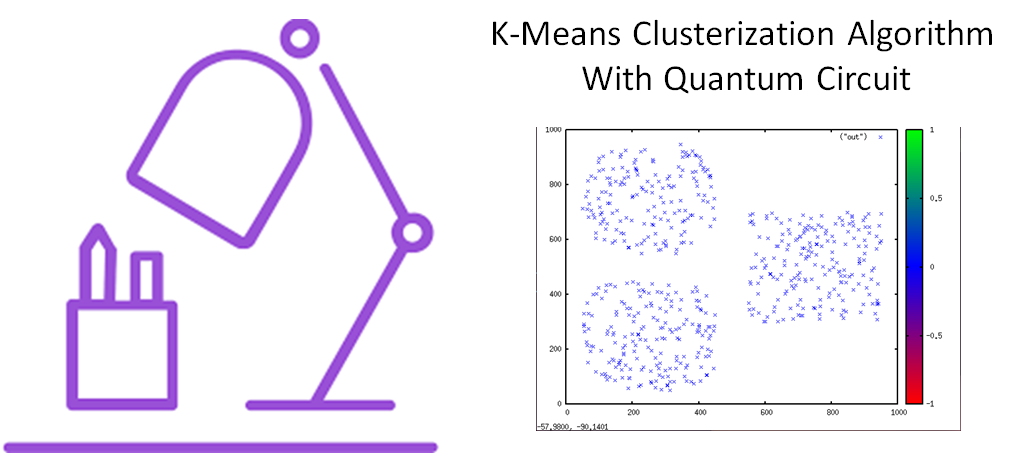


## 2 of 2

By Ennio Picarelli & Claudio Retico

## Determination of the distance between two points in quantum logic

Let's see how to apply a quantum circuit to calculate the distance between two points.

It is not a real Euclidean distance but a measure of the probability for the two qubits at which has been imposed a  'rotation' equal to the theta angle of being considered as equal (the more the angle are close, the more increases this probability)

## The cswap circuit
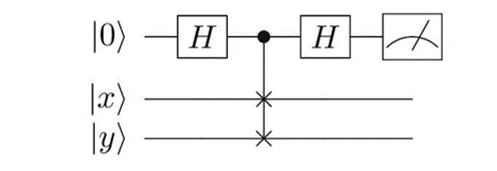
From the article _Quantum K-Means algoritm_ written by Shan Jin, Xi He, Xiaokai Hou, Li Sun, Dingding Wen, Shaojun Wu, and Xiaoting Wang

The circuit is composed by a so called controlled swap (c-swap) or Fredkin circuit in which the ancilla bit has been put in superposition state by using a Hadamard gate, then another Hadamard makes the circuit reversible. 

The c-swap circuit inverts the controlled qubits when the value of the ancilla bit is one and puts the whole system in entanglement status.

Only the ancilla bit is measured at the end but, because of the entanglement state of the system it records also the states of the controlled qubits.

With reference to the figure, the whole state of the quantum system can be expressed by:

$|0_{anc}>|x>|y> -> \frac{1}{2}|0_{anc}>(|xy>+|yx>) + \frac{1}{2}|1_{anc}>(|xy>-|yx>)$

Starting from this point it can be demonstrated that the probability to measure $|1>$ as the final state is

$P(|1_{anc}>)=\frac{1}{2}-\frac{1}{2}|<x|y>|^2$

This is in positive correlation with the Dirac expression of the Euclidean distance:

$Euclidean Distance=\sqrt{(2-2|<x|y>|)}$     (it can be demponstated starting from the traditional expression of the Euclidean distance:
$d=\sqrt{(x_1-y_1)^2+(x_2-y_2)^2}$ = 

$\sqrt{x_1^2+y_1^2-2x_1y_1+x_2^2+y_2^2-2x_2y_2}$  and considering that the qubit can be considered a base in $C_n$

=  $\sqrt{2-2(x_1y_1+x_2y_2)}$ but $x_1y_1+x_2y_2$ is equal to $<x|y>$ ...



In the following exercise we will put $U_3 gates $ in the controlled qubit applyng to the qubits a rotation proportional to the $\theta$ value of the angle to
be used as an equivalent of the ratio between two features.

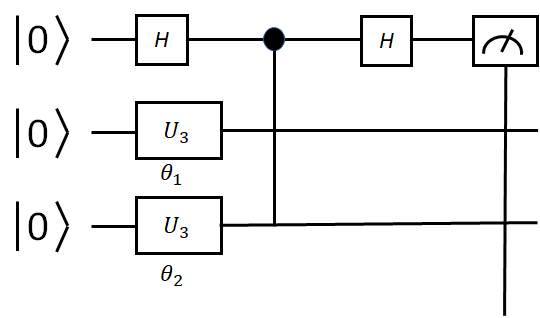
If the angle are close each other then the probability that the two qubits are considered equals (and so the probability of 'one' measure of the ancilla) is

low. Instead, in the case the angle are different, the c-swap operates more often and the 'one' measure rate is higher. 


In [ ]:
#!pip install latex
import sys
import types
import pip
import numpy as np
import math
import latex
import pandas as pd

## Preparation of libraries and quantum credentials

In [ ]:
!pip uninstall qiskit-chemistry -y 
!pip uninstall qiskit-aqua -y
!pip uninstall qiskit -y
!pip install tensorflow --ignore-installed --quiet
!pip install qiskit qiskit-aqua qiskit-chemistry --ignore-installed --quiet
#!pip install qiskit-aqua --ignore-installed --quiet
#!pip install qiskit-chemistry --ignore-installed --quiet
#!pip install -U latex --quiet

In [ ]:
# insert Q API token
API_TOKEN = '7aecb025c75e61c95fcde04d3bdb0109e0ce735b872bbfb7d9a4b8ef336d0b061f222286e9f15352f85b93930d3b0f610b3ed88f7bfc961008f603a35733e07b'

if 'API_TOKEN' not in locals():
     raise Exception('Please set up your access token')

pi = math.pi

## Connection with IBM Q systems (both physical and simulation)

In [ ]:
import getpass, time
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer, IBMQ


# import basic plot tools
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram, plot_state
from qiskit.tools.visualization import iplot_histogram
 

QX_TOKEN = API_TOKEN
QX_URL = "https://quantumexperience.ng.bluemix.net/api"

try:
    # Authenticate with the IBM Q API in order to use online devices.
    # You need the API Token and the QX URL.
    IBMQ.enable_account(QX_TOKEN, QX_URL)

    print('\nYou have access to great power!')
    #print(available_backends({'local': False, 'simulator': False}))
    print(IBMQ.backends())
except: 
    print('Something went wrong.\nDid you enter a correct token?')

In [ ]:
backend = Aer.get_backend('qasm_simulator')

## Loading the dataset for quantum analysis

WARNING: no multiplication by 10,000 of theta to not distort any calculation

In [ ]:
# The code was removed by Watson Studio for sharing.

In [ ]:
dataset.shape

In [ ]:
# Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
# and your Classical Register "cr"
qr = QuantumRegister(5)
cr = ClassicalRegister(5)
qc = QuantumCircuit ( qr, cr, name="k_means")

## First build and test of quantum circuit
A particular aspect of quantum programming is that an algorithm is created by defining a "quantum circuit". This circuit is volatile, i.e. every time the measurement is made on it, it collapses in a specific state making the whole circuit no more usable. So this must be recreated. In case of iterative cycles, therefore, at each cycle the circuit must be recreated.

In [ ]:
#Circuit test
i=0
j=7

theta_1 = dataset.at[i,'Teta']
theta_2 = dataset.at[i+j,'Teta']
    #Achieve the quantum circuit via qiskit
#qc.reset(qr)    
qc.h(qr[2])
qc.h(qr[1])
qc.h(qr[4])
qc.barrier()
qc.u3(theta_1, pi, pi, qr[1])
qc.u3(theta_2, pi, pi, qr[4])

qc.cswap(qr[2], qr[1], qr[4])

qc.h(qr[2])

qc.measure(qr[2], cr[2])
#qc.measure(qr[1], cr[1])
#qc.measure(qr[4], cr[4])
job_exp = execute(qc, backend=backend, shots=4096)  
result = job_exp.result()
print(result)


In [ ]:
print(result.get_counts(qc))

In [ ]:
plot_histogram(result.get_counts(qc))

In [ ]:
circuit_drawer(qc)

## In the following plot we can see many different visualizations related to the quantum circuit

In [ ]:
# State vector visualizing

#state_vec_sim_bck="statevector_simulator"
state_vec_sim_bck=Aer.get_backend('statevector_simulator')

n = 5  # number of qubits 
q = QuantumRegister(n)
c = ClassicalRegister(n)

i=1
j=3

qc = QuantumCircuit(q, c, name="State_super")
theta_1 = dataset.at[i,'Teta']
theta_2 = dataset.at[i+j,'Teta']
    #Achieve the quantum circuit via qiskit
qc.h(q[2])
qc.h(q[1])
qc.h(q[4])
qc.h(q[1])
qc.u3(theta_1, pi, pi, q[1])
qc.u3(theta_2, pi, pi, q[4])
qc.cswap(q[2], q[1], q[4])
qc.h(q[2])

# execute the quantum circuit 
job = execute(qc, backend=state_vec_sim_bck)
state_superposition = job.result().get_statevector(qc)

## The overall matrix defining the whole circuit 
_Coefficients_

In [ ]:
def overlap(state1, state2):
    return round(np.dot(state1.conj(), state2))

print(state_superposition)

overlap(state_superposition, state_superposition)

_probability density_

In [ ]:
def state_2_rho(state):
    return np.outer(state, state.conj())

rho_superposition=state_2_rho(state_superposition)
print(rho_superposition)

## The 3-d representation of the complex coefficients

In [ ]:
from qiskit.tools.visualization import plot_state_city, plot_bloch_multivector, plot_state_paulivec, plot_state_hinton, plot_state_qsphere
plot_state_city(rho_superposition, figsize=(20,10), title="Circuit", color=['blue', 'orange'])
#plot_state(rho_superposition,'city')

## Same as above but as a map

In [ ]:
plot_state_hinton(state_superposition)

## Bloch state of the single qubits

In [ ]:
plot_bloch_multivector(state_superposition)

In [ ]:
plot_state_qsphere(state_superposition)

## Massive cycle execution of all possible distance pairs
A double loop cycle is implemented by running the circuit on all pairs of points.

In [ ]:
# Define result dataframe
df_res = pd.DataFrame(columns=('I', 'J','Annual Income_i','Annual Income_j','Spending Score_1_to_100_i','Spending Score_1_to_100_j','Theta_i', 'Theta_j', 'Quantum_Distance','ClassicDistance'))

#Define a loop to compute the distance between each pair of points

elements=20

#main cycle
for i in range(0,elements):
    for j in range(0,elements): 
        # Set the parament theta about different point
        theta_1 = dataset.at[i,'Teta']
        theta_2 = dataset.at[j,'Teta']
        ai_i = dataset.at[i,'Annual Income_k$']
        ai_j = dataset.at[j,'Annual Income_k$']
        sc_i = dataset.at[i,'Spending Score_1_to_100']
        sc_j = dataset.at[j,'Spending Score_1_to_100']
        
        qr = QuantumRegister(5)
        cr = ClassicalRegister(5)
        qc = QuantumCircuit ( qr, cr, name="k_means")
        
        # Achieve the quantum circuit via qiskit
        qc.h(qr[2])
        qc.h(qr[1])
        qc.h(qr[4])
        qc.u3(theta_1, pi, pi, qr[1])
        qc.u3(theta_2, pi, pi, qr[4])
        qc.cswap(qr[2], qr[1], qr[4])
        qc.h(qr[2])
        qc.measure(qr[2], cr[2])
        
        # eseguo il circuito costruito sulla coppia I,J
        job_exp = execute(qc, backend=backend, shots=2048) 
        result = job_exp.result()
        # calculate the ratio between the 0 and tha one result in measure registry
        v1=result.get_counts(qc)['00000']
        if '00100' in result.get_counts(qc):
            v2=result.get_counts(qc)['00100']
        else:
            v2=0
        prob=v2/(v1+v2) # Probability of obtaining 1 that is "quantum distance"
        # Classic distance calculation
        cl_dist=math.sqrt(((ai_i-ai_j)**2)+((sc_i-sc_j)**2))

        #Final output writing
        df_res = df_res.append({'I':i, 'J':j,'Annual Income_i':ai_i,'Annual Income_j':ai_j,'Spending Score_1_to_100_i':sc_i,'Spending Score_1_to_100_j':sc_j,
                                'Theta_i':theta_1, 'Theta_j':theta_2, 'Quantum_Distance':prob,'ClassicDistance':cl_dist} , ignore_index=True)
print('JOB Ended')

In [ ]:
# Result Dataset Information
df_res.info()

In [ ]:
# check for null values
df_res.isnull().sum()

In [ ]:
df_res.to_csv('QuantumDistances.csv',index=False)

In [ ]:
df_res = pd.read_csv('QuantumDistances.csv')
df_res.head()

In [ ]:
df_res.drop(['Annual Income_i', 'Annual Income_j','Spending Score_1_to_100_i','Spending Score_1_to_100_j','ClassicDistance'], axis=1, inplace=True)

In [ ]:
df_res.to_csv('QuantumDistances2.csv',index=False)

In [ ]:
df_res = pd.read_csv('QuantumDistances.csv')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset=df_res
dataset

In [ ]:
dataset['Quantum_Distance_Norm']=(dataset['Quantum_Distance']-dataset['Quantum_Distance'].min())/(dataset['Quantum_Distance'].max()-dataset['Quantum_Distance'].min())
dataset['ClassicDistance_Norm']=(dataset['ClassicDistance']-dataset['ClassicDistance'].min())/(dataset['ClassicDistance'].max()-dataset['ClassicDistance'].min())
dataset.head()


In [ ]:
df_res.to_csv('QuantumDistanceNormalized.csv',index=False)

## Calculation Correlation between Quantum and Classic Distance

In [ ]:
cor=dataset['Quantum_Distance'].corr(dataset['ClassicDistance'],method='pearson')
print("{0:.0f}%".format(cor * 100))

## Diagrams of correlation with Seaborn of a dataset with distances only

In [ ]:
dataset.drop(['Annual Income_i', 'Annual Income_j','Spending Score_1_to_100_i','Spending Score_1_to_100_j','Theta_i','Theta_j','I','J'], axis=1, inplace=True)

In [ ]:
sns.pairplot(dataset)

In [ ]:
# The code was removed by Watson Studio for sharing.

## Now we will calculate the clusters by using the quantum distance
First of all we will define the quantum distance as a function

In [ ]:
def quantumdistance(theta_1,theta_2, shots):
#    prob=np.zeros(3)
#    for j in range(0,3):
        pi = math.pi
        qr = QuantumRegister(5)
        cr = ClassicalRegister(5)
        qc = QuantumCircuit ( qr, cr, name="k_means")
        
        # Achieve the quantum circuit via qiskit
        qc.h(qr[2])
        qc.h(qr[1])
        qc.h(qr[4])
        qc.u3(theta_1, pi, pi, qr[1])
        qc.u3(theta_2, pi, pi, qr[4])
        qc.cswap(qr[2], qr[1], qr[4])
        qc.h(qr[2])
        qc.measure(qr[2], cr[2])
#        qc.reset(qr)n
        # eseguo il circuito costruito sulla coppia I,J
        backend = Aer.get_backend('qasm_simulator')
        job_exp = execute(qc, backend=backend, shots=shots) 
        result = job_exp.result()
        # calculate the ratio between the 0 and tha one result in measure registry
        v1=result.get_counts(qc)['00000']
        if '00100' in result.get_counts(qc):
            v2=result.get_counts(qc)['00100']
        else:
            v2=0
            
        prob=v2/(v1+v2) # Probab
#        prob[j]=v2/(v1+v2) # Probab
#    probability=(prob[0]+prob[1]+prob[2])/3    
#    return probability
        return prob
miocalcolo=quantumdistance(1.,0.01, 2048)
print(miocalcolo)

## Now we will load another dataset which enhances clusters differences

In [ ]:
# The code was removed by Watson Studio for sharing.

## Let's read the dataset in X Matrix

In [ ]:
s=(20,2)
X=np.zeros(s)
X[:,0]=dataset['ID']
X[:,1]=dataset['Teta']*1.

In [ ]:
#If you zoom out this curve then you will see that last elbow comes at k=3
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,21)
##Finally we got that k=5
from sklearn.cluster import KMeans

#Model Build
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=42,max_iter=100000,tol=0.00000001, verbose=0)
y_kmeans= kmeansmodel.fit_predict(X)
kmeans= kmeansmodel.fit(X)

In [ ]:
# centroids position
centers_float = kmeans.cluster_centers_
#centers=np.rint(centers_float).astype(int)
centers=(centers_float)
print('centroids=',centers)

In [ ]:
#Visualizing all the clusters 

plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'green', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'orange', label = 'Cluster 5')
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5,label = 'Centroids');
plt.title('Clusters of customers Teta Mode')
plt.xlabel('Customer ID')
plt.ylabel('Theta')
x = X[:, 0]
y = X[:, 1]
etichette=dataset['ID'].tolist()
for i, txt in enumerate(etichette):
    plt.annotate(txt, (x[i], y[i]))
plt.legend()
plt.grid()
plt.show()

In [ ]:
def findClosestCentroids(X, centroids, mode):
#FINDCLOSESTCENTROIDS computes the centroid memberships for every example
#   idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
#   in idx for a dataset X where each row is a single example. idx = m x 1 
#   vector of centroid assignments (i.e. each entry in range [1..K])
#

# Set K
    dimension=np.size(X,0)

    K = np.size(centroids,0);

# You need to return the following variables correctly.
    s=(dimension)
    idx = np.zeros(s,dtype=int);

    for i in range(0,dimension):
        minimo=10000
        dist=0
        for j in range(0,K):
            if mode==1: 
                dist = (X[i,0]-centroids[j,0])**2+(X[i,1]-centroids[j,1])**2
            else:
                dist=quantumdistance(X[i,1],centroids[j,1], 2048)
            if dist <= minimo:
                minimo = dist
                idx[i] = j
    return idx
s=(3,2)
centroids=np.zeros(s)

centroids=centers

print('Centroids=',centroids)
Classic=findClosestCentroids(X, centroids, 1)
print('Clusters with Classic',Classic)
Quantistic=findClosestCentroids(X, centroids, 0)
print('Clusters with Quantistuc',Quantistic)

In [ ]:
#Visualizing all the clusters 

plt.figure(figsize=(20,10))
plt.scatter(X[Quantistic == 0, 0], X[Quantistic == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[Quantistic == 1, 0], X[Quantistic == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[Quantistic == 2, 0], X[Quantistic == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
#plt.scatter(X[Quantistic == 3, 0], X[Quantistic == 3, 1], s = 50, c = 'green', label = 'Cluster 4')
#plt.scatter(X[Quantistic == 4, 0], X[Quantistic == 4, 1], s = 50, c = 'orange', label = 'Cluster 5')
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5,label = 'Centroids');
plt.title('Clusters of customers Teta Quantum Mode')
plt.xlabel('Customer ID')
plt.ylabel('Theta')
x = X[:, 0]
y = X[:, 1]
etichette=dataset['ID'].tolist()
for i, txt in enumerate(etichette):
    plt.annotate(txt, (x[i], y[i]))
plt.legend()
plt.grid()
plt.show()